In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
import visualkeras

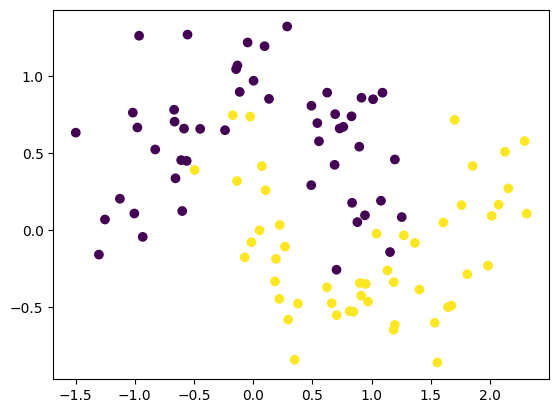

In [4]:
X, y = make_moons(100, noise=0.25,random_state=2) # toy dataset with 2 features: 100 samples
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y) # to generates different colors with binary values in data
plt.show()

In [16]:
X.shape

(100, 2)

In [20]:
model1 = Sequential()
model1.add(Dense(128,input_dim=2, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1,activation='sigmoid'))
model1.summary()
visualkeras.layered_view(model1).show() 

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               384       
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


9600/9600 [==============================] - 8s 829us/step


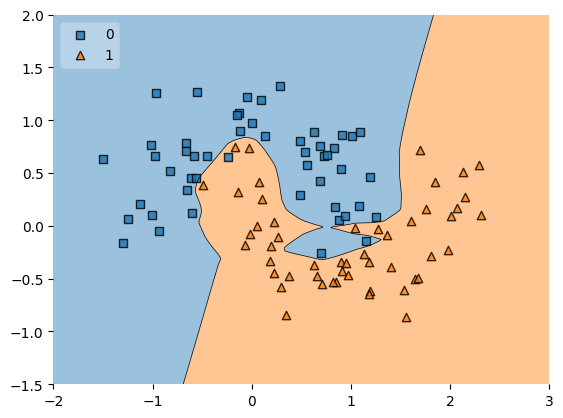

In [7]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, 
metrics=['accuracy'])
history1 = model1.fit(X, y, epochs=2000, validation_split =
0.2,verbose=0)
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2) # X is for input data, y=integer labels, clf=model1 trained classifier, legend=2 location of legend point
plt.xlim(-2,3) # sets the limits of the x-axis 
plt.ylim(-1.5,2) # sets the limits of the y-axis
plt.show()

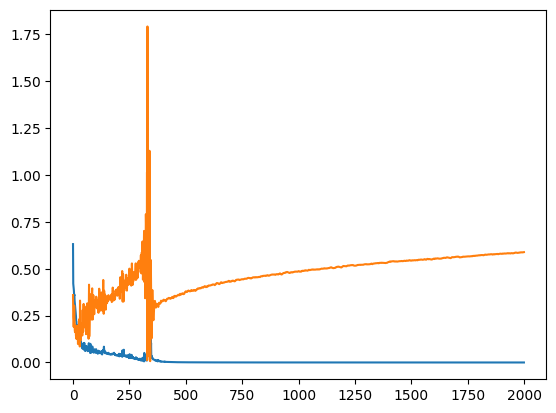

In [8]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [21]:
model2 = Sequential()
model2.add(Dense(128,input_dim=2, 
activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.001)))
model2.add(Dense(128, 
activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(1,activation='sigmoid'))
model2.summary()
visualkeras.layered_view(model2).show() 

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               384       
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dense_14 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


9600/9600 [==============================] - 10s 1ms/step


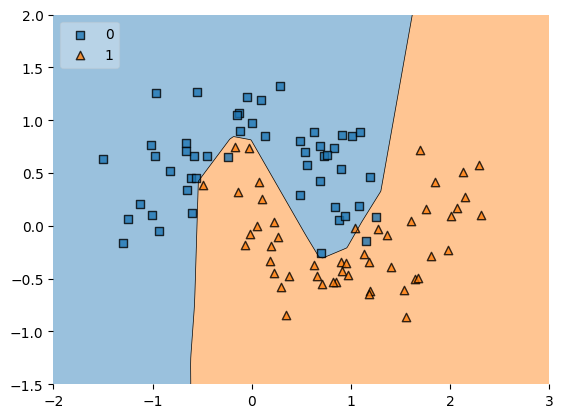

In [11]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, 
metrics=['accuracy'])
history2 = model2.fit(X, y, epochs=2000, validation_split =
0.2,verbose=0)
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()


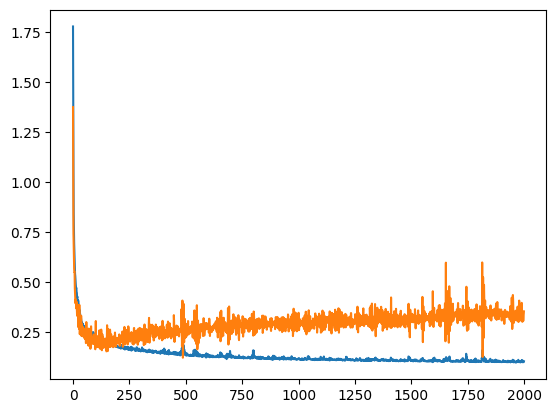

In [13]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])


In [14]:
# Calculation of accuarcy of each model
# Calculate the accuracy for model1
acc_model1 = history1.history['accuracy'][-1] * 100
# Calculate the accuracy for model2
acc_model2 = history2.history['accuracy'][-1] * 100
print(f"Accuracy for Model 1: {acc_model1:.2f}%")
print(f"Accuracy for Model 2: {acc_model2:.2f}%")


Accuracy for Model 1: 100.00%
Accuracy for Model 2: 96.25%
